## Simple Linear Regression 


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height vs Weight')

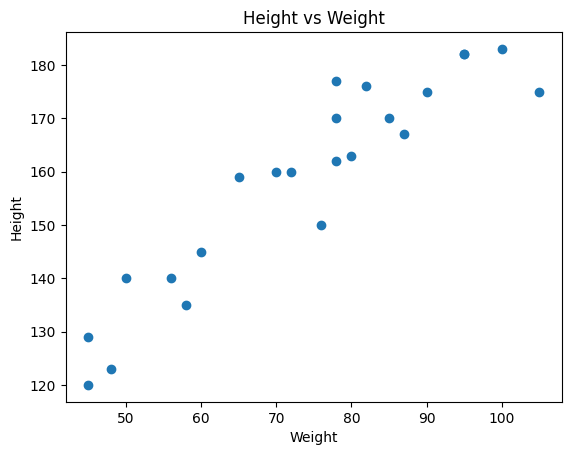

In [3]:
## Scatter plot 

plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')

In [4]:
## Finding corelation
correlation = df.corr()
print(correlation)

          Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000


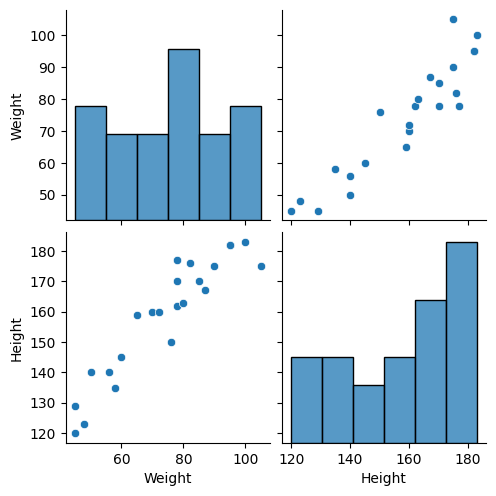

In [5]:
## seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [ ]:
## independent and dependent features 
X = df[['Weight']] ## independent feature should be in the form of DataFrame
y = df['Height']  ## dependent feature can be in the form of Series or Data


((23, 1), (23,))

In [10]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [21]:
## standardization
from sklearn.preprocessing import StandardScaler
scaler  =  StandardScaler()
X_train = scaler.fit_transform(X_train)


In [22]:
X_test = scaler.transform(X_test)

In [23]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [26]:
## Applying Linear Regression algorithm

from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)

In [27]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [30]:
print(regression.coef_) ## slope
print(regression.intercept_) ## y-intercept


[17.2982057]
156.47058823529412


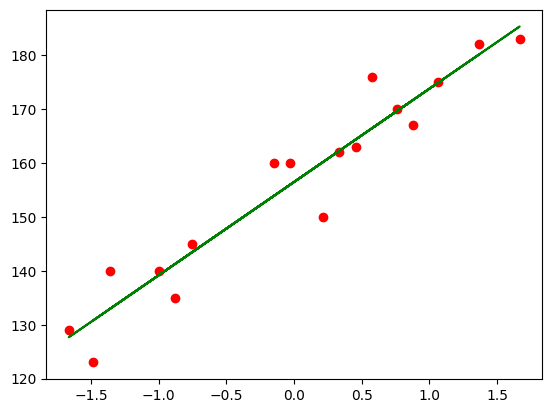

In [37]:
## plot training data plot best fit line
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regression.predict(X_train), color = 'green')

In [38]:
## Prediction on test data
y_pred = regression.predict(X_test)
print(y_pred)

[162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]


In [42]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
## R2 Score
print('R2 Score:', r2_score(y_test, y_pred))


MAE: 9.66512588679501
MSE: 114.84069295228699
RMSE: 10.716374991212605
R2 Score: 0.7360826717981276


In [43]:
## adjusted R2 score
1-(1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [47]:
## prediction for a new value 
regression.predict(scaler.transform([[75]]))

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([159.12122213])